In [1]:
# importing the necessary libraries:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data:
df = pd.read_csv('salary_data_cleaned.csv')

#### view the structure of the dataframe

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_name,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  employer_provided  742 non-null    int64  
 15  hourly             742 non-null    int64  
 16  min_salary         742 non

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [7]:
# functions that will identify the different job title in the dataframe:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

### Data format steps

In [8]:
        # Job title and seniority
        # Fix state los Angeles
        # Job description length
        # Competitor count
        # hourly wage to annual
        # remove new line from job title

#### Job title and seniority

In [9]:
# creating a new column job_simp in the dataframe:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [10]:
# count of job titles in the job_simp column:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
data analyst      102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [11]:
# creating a new column seniority in the dataframe:
df['seniority'] = df['Job Title'].apply(seniority)

In [12]:
# count of job titles in the seniority column
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

#### Fix state los Angeles

In [13]:
# fixing the los Angelos
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angelos' else 'CA')

In [14]:
# count of states in the job_state column:
df.job_state.value_counts()

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
NC              21
WA              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
MO               9
AZ               9
AL               8
KY               6
GA               6
DE               6
MI               6
CT               5
IA               5
LA               4
NE               4
OR               4
KS               3
NM               3
MN               2
ID               2
SC               1
RI               1
Los Angeles      1
Name: job_state, dtype: int64

#### Job description length

In [15]:
# finding the length of characters in job descriptions:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [16]:
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

#### Competitor count

In [17]:
# spliting the competitors column by the comma separator:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [18]:
df.num_comp.value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

#### hourly wage to annual

In [19]:
# coverting both min/max_ salary hourly wage to annual wage:
df['min_salary'] = df.apply(lambda x: x.min_salary *2 if x.hourly ==1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary *2 if x.hourly ==1 else x.min_salary, axis = 1)

In [21]:
# viewing the three columns using the hourly wage in $:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


#### remove new line from job title

In [22]:
# removing the \n from the job title column:
df['company_name'] = df.company_name.apply(lambda x: x.replace('\n', ' '))

In [23]:
df['company_name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_name, Length: 742, dtype: object

In [24]:
# summary statistics:
df.describe()

,Rating,Founded,employer_provided,hourly,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.022911,0.032345,74.719677,75.350404,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.149721,0.177034,30.980593,30.531259,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,15.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,53.250000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,71.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,91.750000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,202.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


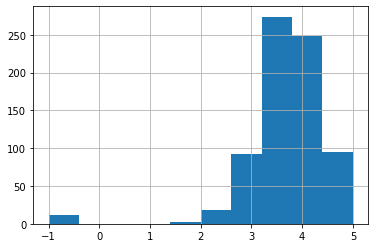

In [25]:
# drawing histogram of the ratings:
df.Rating.hist();

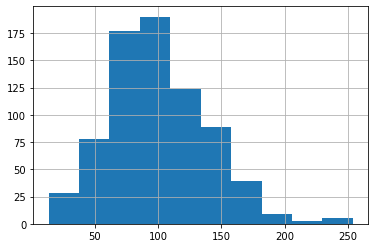

In [26]:
# ploting histogram for the avg salaary:
df.avg_salary.hist();

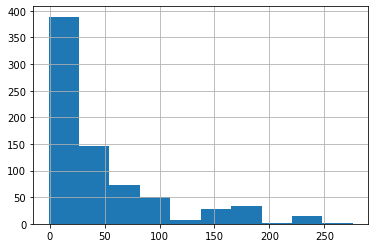

In [27]:
# plot histogram for age:
df.age.hist();

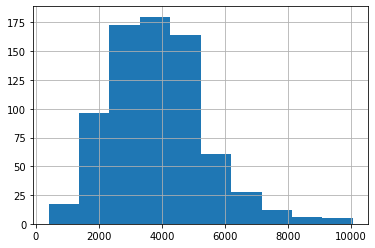

In [28]:
# plot for desc_len:
df.desc_len.hist();

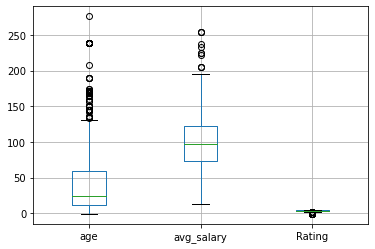

In [29]:
# plot the boxplot for the age, avg_salary and rating columns:
df.boxplot(column = ['age', 'avg_salary','Rating']);

In [30]:
# to see the correlation b/w age, avg_salary and rating desc_len:
df[['age', 'avg_salary','Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


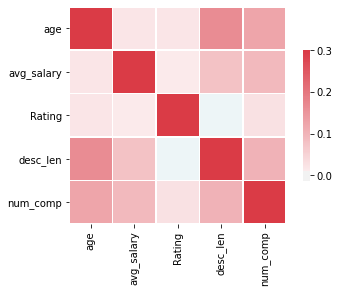

In [31]:
# the correlation using the heatmap:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary','Rating', 'desc_len', 'num_comp']].corr(), vmax= .3, center=0, cmap=cmap,
           square=True, linewidth=.8, cbar_kws={"shrink": .6});

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [34]:
# creating a new dataframe for all the necessary categorical data:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',  'Sector', 'Revenue', 'company_name',
             'job_state', 'same_state', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]     

In [35]:
df_cat.head()

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_name,job_state,same_state,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,1,1,0,0,0,0,data scientist,na
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,1,1,0,0,0,1,data scientist,na


In [36]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Location           742 non-null    object
 1   Headquarters       742 non-null    object
 2   Size               742 non-null    object
 3   Type of ownership  742 non-null    object
 4   Industry           742 non-null    object
 5   Sector             742 non-null    object
 6   Revenue            742 non-null    object
 7   company_name       742 non-null    object
 8   job_state          742 non-null    object
 9   same_state         742 non-null    int64 
 10  python_yn          742 non-null    int64 
 11  R_yn               742 non-null    int64 
 12  spark              742 non-null    int64 
 13  aws                742 non-null    int64 
 14  excel              742 non-null    int64 
 15  job_simp           742 non-null    object
 16  seniority          742 non-null    object
dt

graph for Location: total = 200


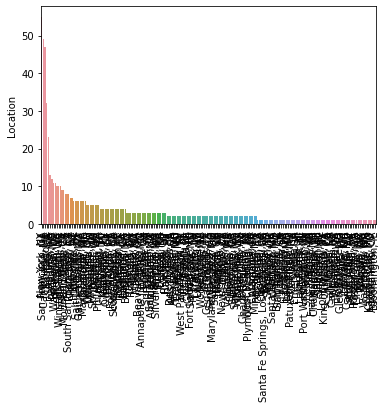

graph for Headquarters: total = 198


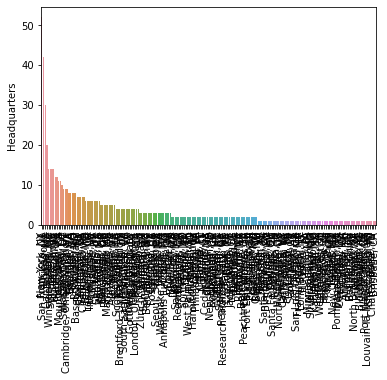

graph for Size: total = 9


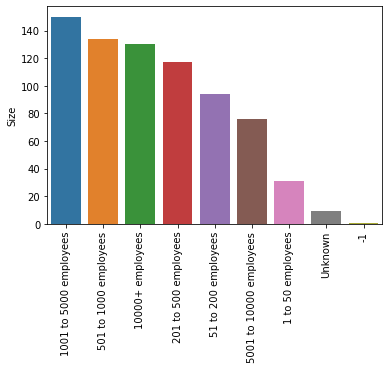

graph for Type of ownership: total = 11


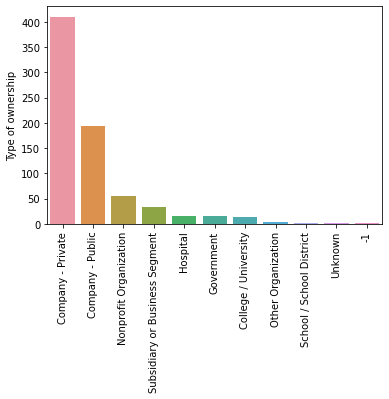

graph for Industry: total = 60


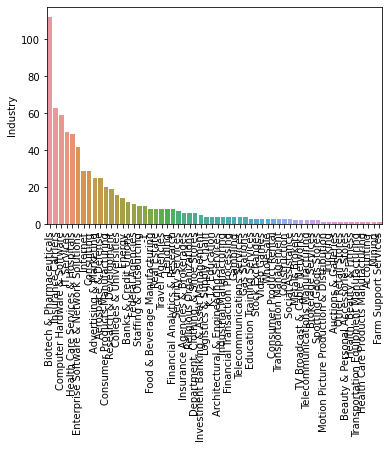

graph for Sector: total = 25


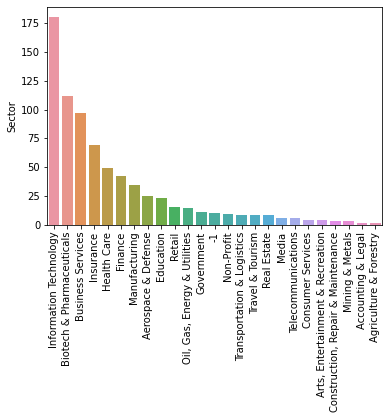

graph for Revenue: total = 14


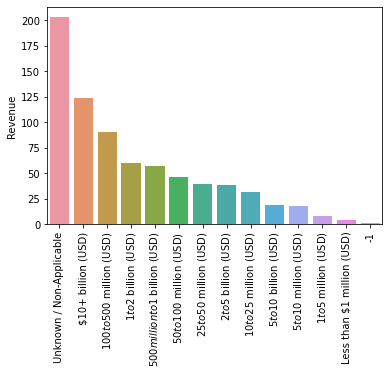

graph for company_name: total = 343


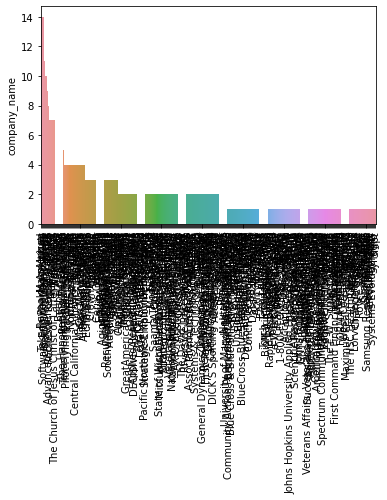

graph for job_state: total = 38


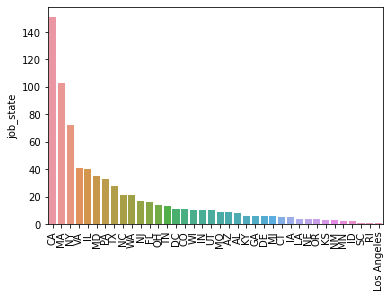

graph for same_state: total = 2


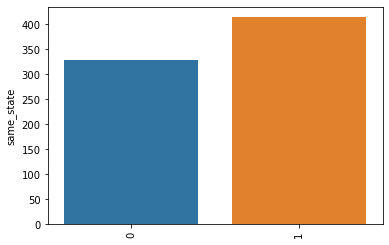

graph for python_yn: total = 2


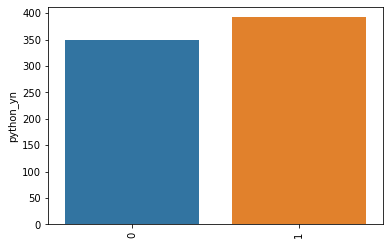

graph for R_yn: total = 2


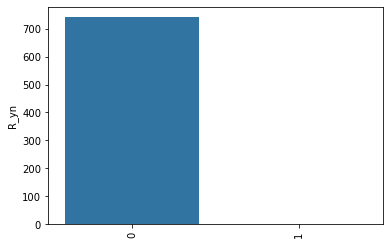

graph for spark: total = 2


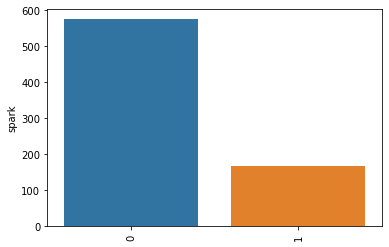

graph for aws: total = 2


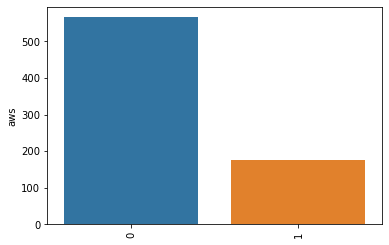

graph for excel: total = 2


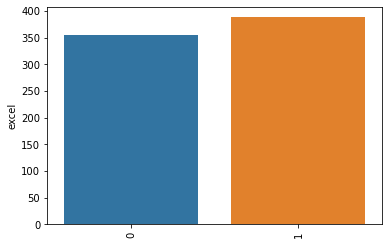

graph for job_simp: total = 7


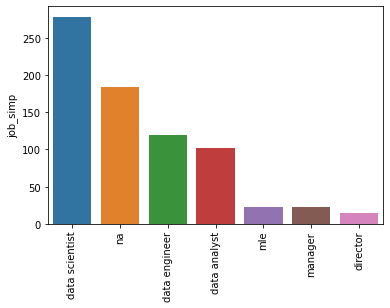

graph for seniority: total = 3


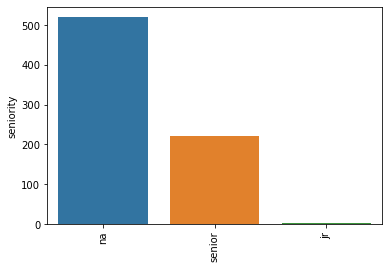

In [37]:
# function that plot a barplot for all of the categorical data:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


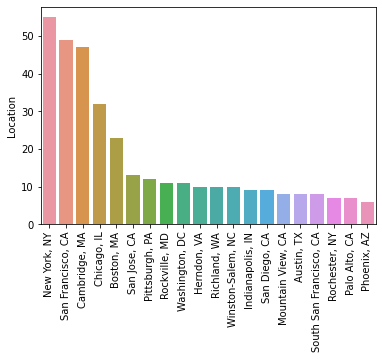

graph for Headquarters: total = 20


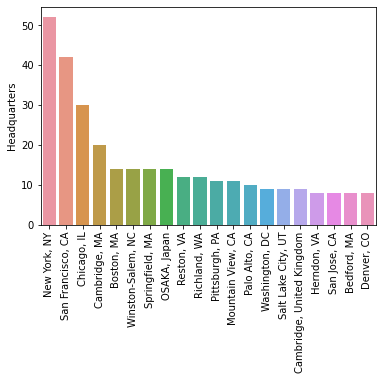

graph for company_name: total = 20


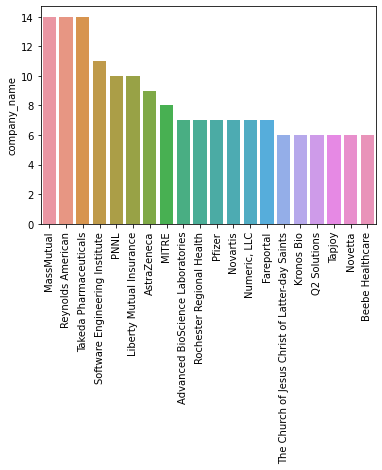

In [38]:
# function that plot a barplot for all of the location, headquarters and company name data:
for i in df_cat[['Location', 'Headquarters', 'company_name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [39]:
# creating a pivot table for the salaries by job_simp:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
data analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [40]:
# pivot table for salaries by level:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
data analyst   jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [41]:
# setting the maximum rows not displaying:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [42]:
# pivot table to count job_simp by states:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state   job_simp                  
WI          na                       4
            data scientist           3
            data analyst             3
WA          na                       1
            data scientist          17
            data analyst             3
VA          na                       5
            mle                      2
            data scientist          18
            data engineer           10
            data analyst             6
UT          data engineer            3
            data analyst             4
            data scientist           3
TX          na                       7
            data scientist          13
            data engineer            8
TN          data scientist           1
            data engineer           10
            data analyst             2
SC          na                       1
RI          data analyst             1
PA          manager                  3
            data engineer            1
            data scientist           6
            data analyst             8
            mle                      7
            na                       8
OR          data scientist           3
            data engineer            1
OH          na                       3
            data scientist           7
            data analyst             4
NY          na                      12
            mle                      2
            data scientist          40
            data engineer            4
            data analyst            14
NM          data scientist           3
NJ          data scientist           4
            data analyst             6
            data engineer            2
            manager                  2
            director                 2
            na                       1
NE          na                       4
NC          na                      12
            data scientist           3
            data engineer            6
MO          na                       3
            manager                  1
            data scientist           3
            data analyst             2
MN          data engineer            1
            data analyst             1
MI          data scientist           4
            manager                  2
MD          na                      16
            data scientist          13
            data engineer            3
            data analyst             3
MA          na                      46
            manager                  5
            director                 6
            data scientist          30
            data engineer           12
            data analyst             4
Los Angeles data scientist           1
LA          data analyst             1
            data engineer            2
            na                       1
KY          na                       4
            data scientist           2
KS          mle                      3
IN          na                       4
            data scientist           2
            data engineer            4
IL          data analyst             3
            na                       6
            mle                      2
            director                 6
            data scientist          15
            data engineer            8
ID          data analyst             2
IA          data analyst             2
            data engineer            3
GA          data scientist           3
            na                       3
FL          data scientist           7
            data engineer            3
            data analyst             6
DE          na                       6
DC          data scientist           5
            data engineer            4
            data analyst             2
CT          na                       3
            data scientist           2
CO          mle                      1
            data engineer            3
            data analyst             1
            na                       3
           

In [43]:
# data scientist avg_salarie by state:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [45]:
# creating a pivot dataframe to gain more insights:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided','python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'desc_len', 'Type of ownership', 'avg_salary']]

In [46]:
df_pivots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             742 non-null    float64
 1   Industry           742 non-null    object 
 2   Sector             742 non-null    object 
 3   Revenue            742 non-null    object 
 4   num_comp           742 non-null    int64  
 5   hourly             742 non-null    int64  
 6   employer_provided  742 non-null    int64  
 7   python_yn          742 non-null    int64  
 8   R_yn               742 non-null    int64  
 9   spark              742 non-null    int64  
 10  aws                742 non-null    int64  
 11  excel              742 non-null    int64  
 12  desc_len           742 non-null    int64  
 13  Type of ownership  742 non-null    object 
 14  avg_salary         742 non-null    float64
dtypes: float64(2), int64(9), object(4)
memory usage: 87.1+ KB


In [47]:
# function that will sort the average salary and rating by job title:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [48]:
# the revenue aggregation for python jobs:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [60]:
# set a new dataframe to remove unclean columns:
mod_df = df[['Job Title','Rating','Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp']]

In [55]:
# !conda install -c conda-forge wordcloud

In [56]:
# !conda update -n base -c defaults conda

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [62]:
# words = " ".join(df['job_simp'])

# def punctuation_stop(text):
#     #"""remove punctuation and stop words""""
#     filtered = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
#     for w in word_tokens:
#         if w not in stop_words and w.isalpha():
#             filtered.append(w.lower())
#     return filtered

# words_filtered = punctuation_stop(words)
# text = " ".join([ele for ele in words_filtered])
# wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
# wc.generate(text)

# plt.figure(figsize=[10,10])
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [63]:
# saving the exploratory data to a new csv dataframe:
mod_df.to_csv('eda_data.csv')